In [1]:
from tarfile import data_filter

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick


In [4]:
#Load preprocessed data
data_df = pd.read_csv("hospital_beds_with_population.csv")
print(data_df.to_string())

                 state  year  population  beds  population_senior  beds_per_1000  beds_per_1000_senior
0                Johor  2015     3610300  4968             347800              1                    14
1                Johor  2016     3651800  5185             363800              1                    14
2                Johor  2017     3697000  5185             380300              1                    14
3                Johor  2018     3749400  5200             397700              1                    13
4                Johor  2019     3761200  5200             412800              1                    13
5                Johor  2020     4009700  5270             401800              1                    13
6                Johor  2021     4020000  5278             420000              1                    13
7                Johor  2022     4028300  5433             434700              1                    12
8                Kedah  2015     2096500  2653             224700        

In [41]:
# Get latest year from your processed population DataFrame
latest_year = data_df["year"].max()

# Filter data for latest year
latest_pop = data_df[data_df["year"] == latest_year].sort_values("population", ascending=True)
latest_pop_senior = data_df[data_df["year"] == latest_year].sort_values("population_senior", ascending=True)
latest_beds = data_df[data_df["year"] == latest_year].sort_values("beds", ascending=True)

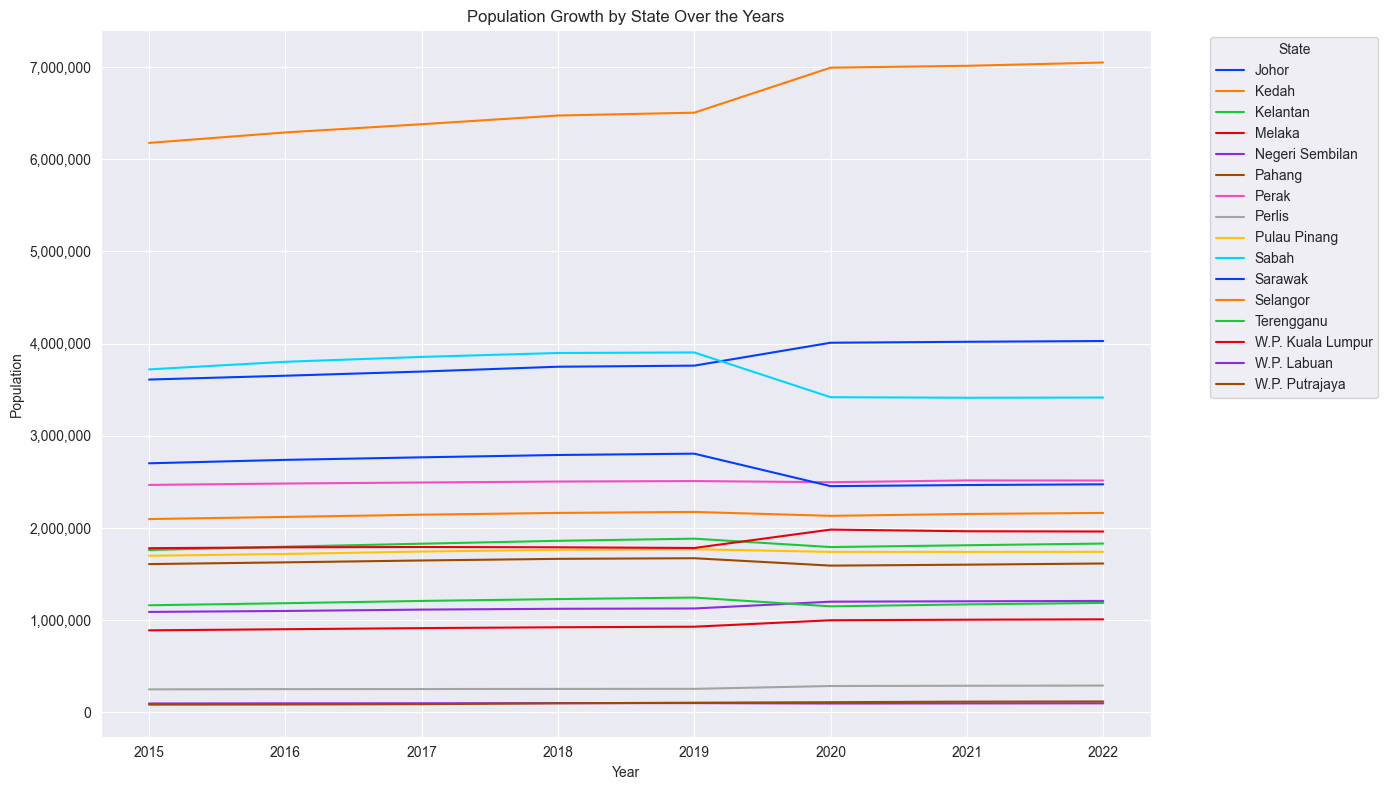

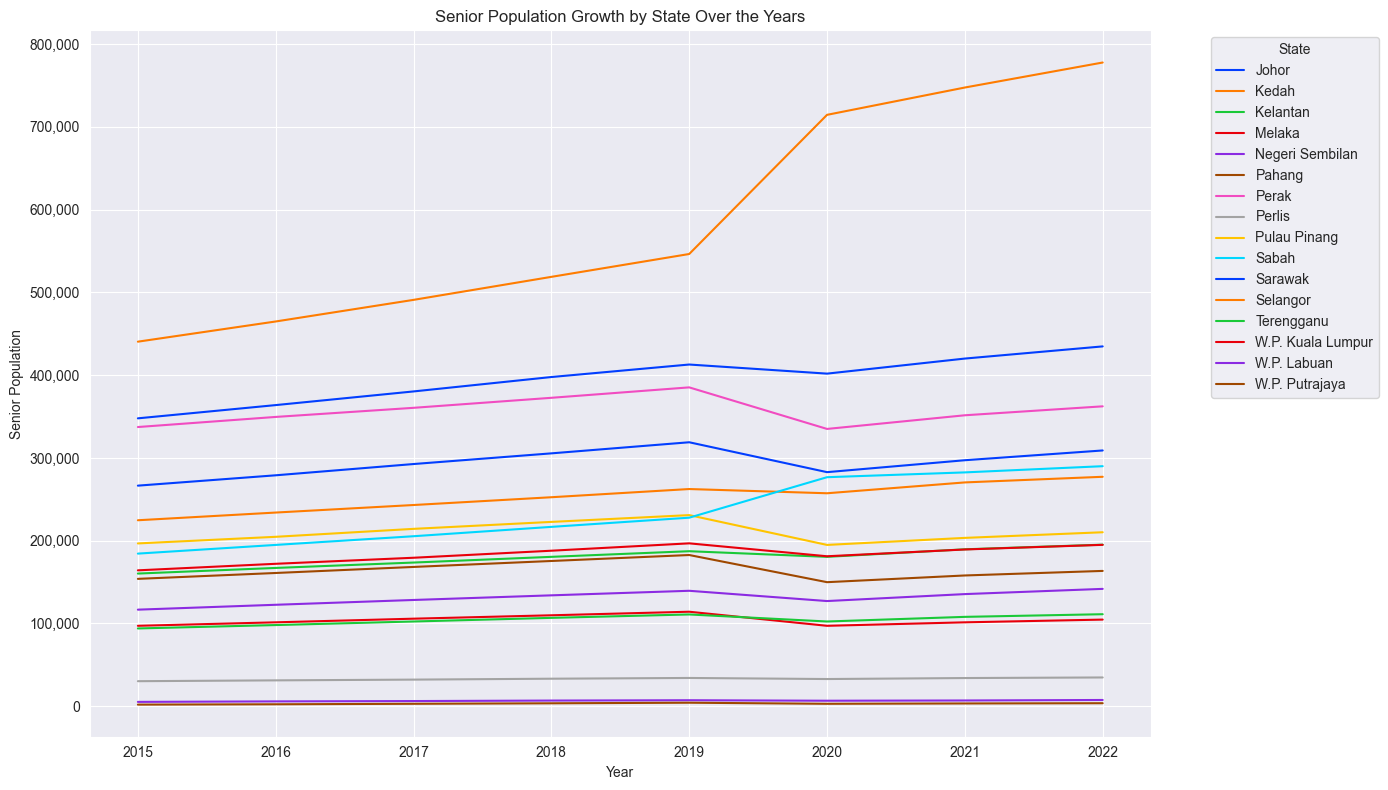

In [52]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_df, x="year", y="population", hue="state", palette="bright")

plt.title("Population Growth by State Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=data_df, x="year", y="population_senior", hue="state", palette="bright")

plt.title("Senior Population Growth by State Over the Years")
plt.xlabel("Year")
plt.ylabel("Senior Population")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

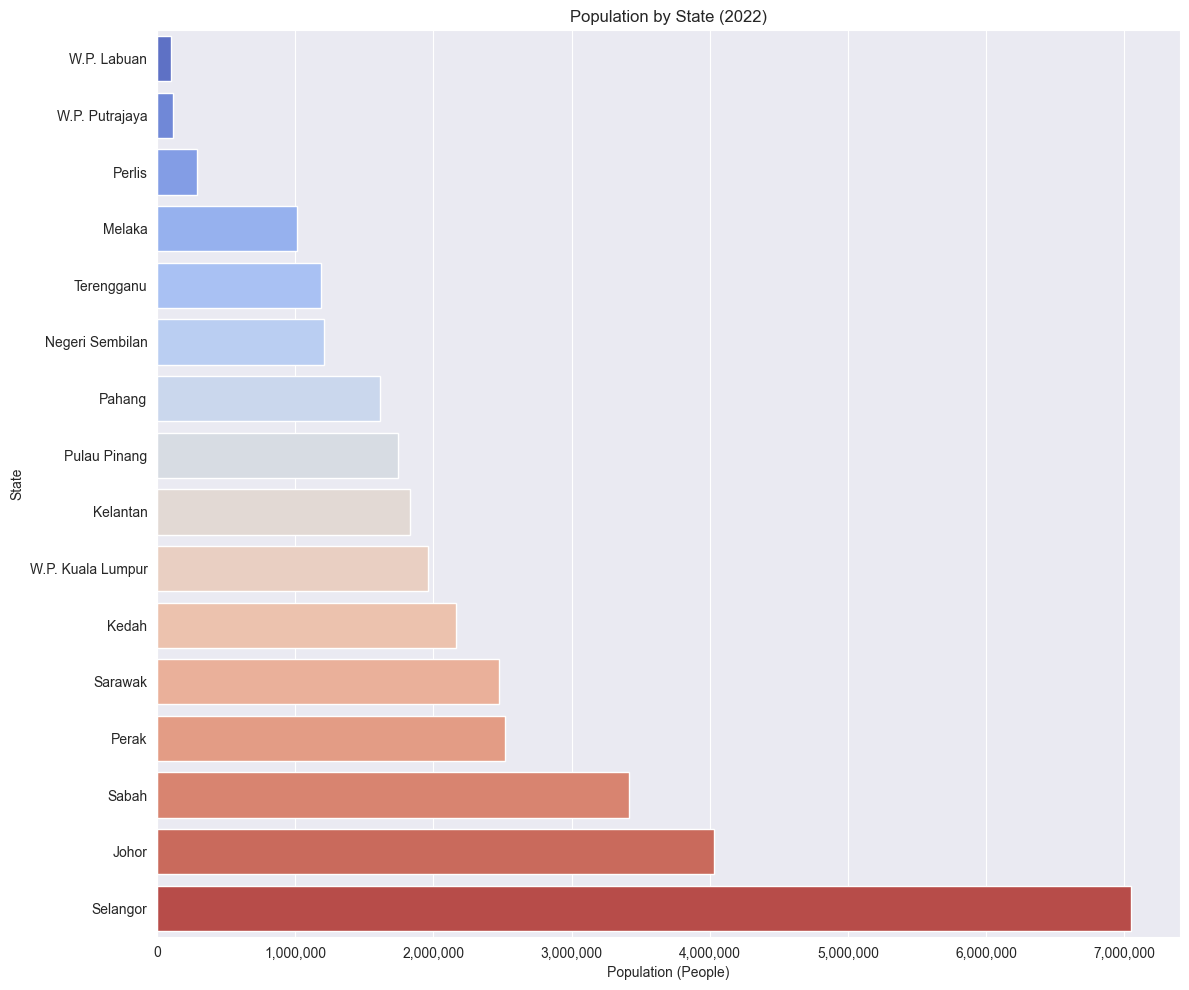

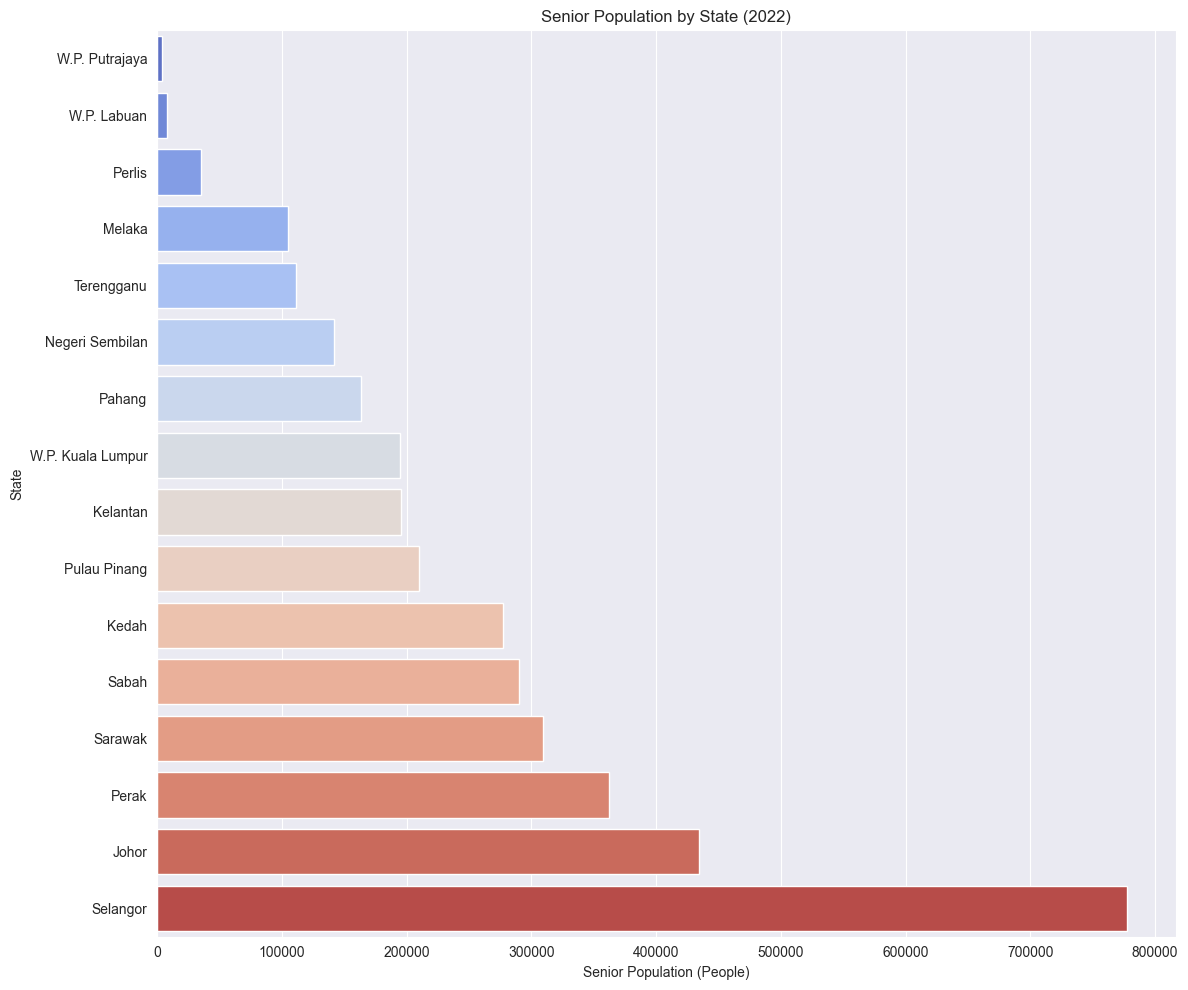

In [56]:
#For all populations by state
plt.figure(figsize=(12, 10))
sns.barplot(data=latest_pop, x="population", y="state", hue="state", palette="coolwarm", dodge=False, legend=False)

plt.title(f"Population by State ({latest_year})")
plt.xlabel("Population (People)")
plt.ylabel("State")
# Format x-axis with commas (e.g., 1,000,000)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

#For senior populations by state
plt.figure(figsize=(12, 10))
sns.barplot(data=latest_pop_senior, x="population_senior", y="state", hue="state", palette="coolwarm", dodge=False, legend=False)

plt.title(f"Senior Population by State ({latest_year})")
plt.xlabel("Senior Population (People)")
plt.ylabel("State")

plt.tight_layout()
plt.show()

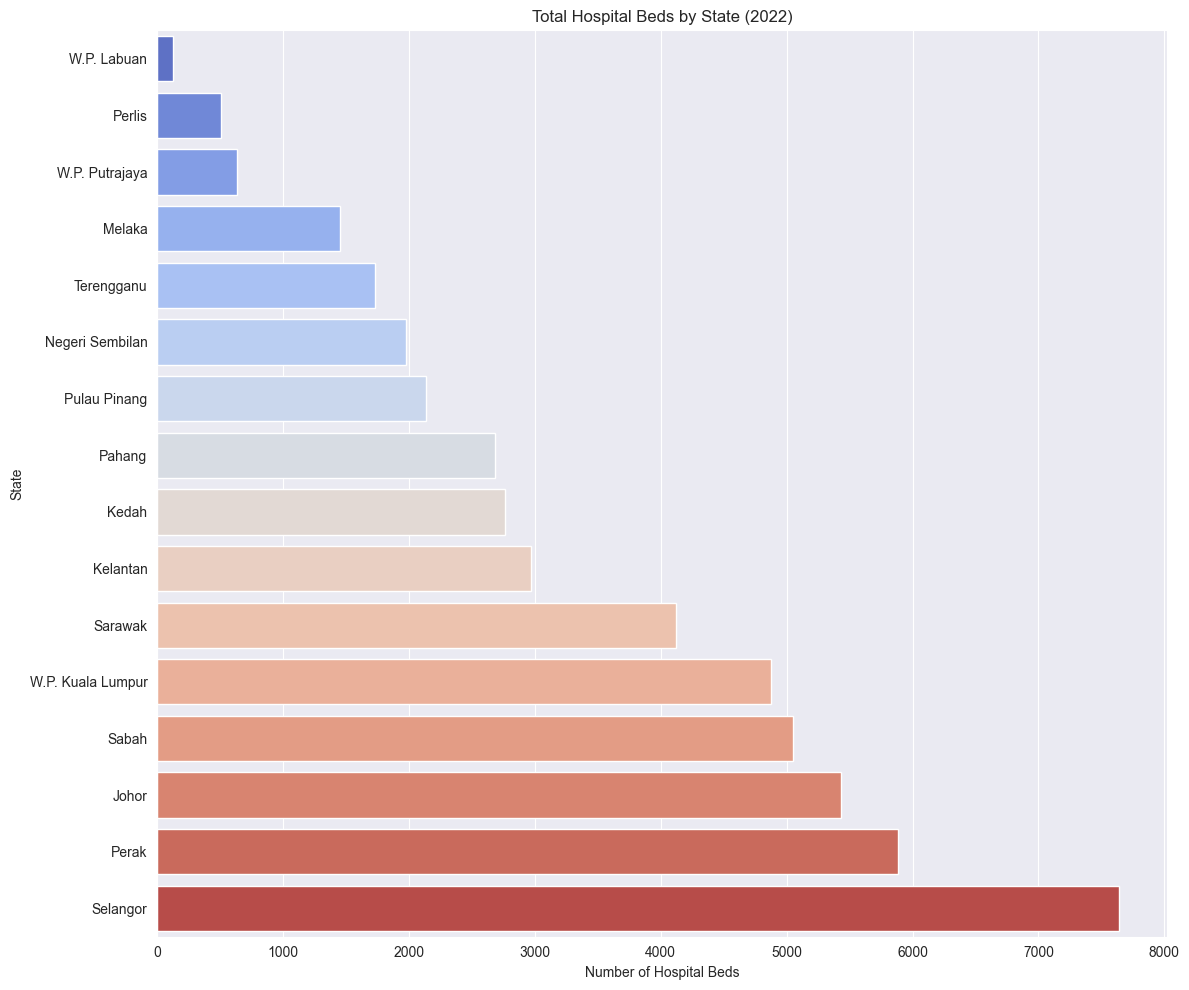

In [55]:
plt.figure(figsize=(12, 10))
sns.barplot(data=latest_beds, x="beds", y="state", hue="state", palette="coolwarm", dodge=False, legend=False)
plt.title(f"Total Hospital Beds by State ({latest_year})")
plt.xlabel("Number of Hospital Beds")
plt.ylabel("State")
plt.tight_layout()
plt.show()

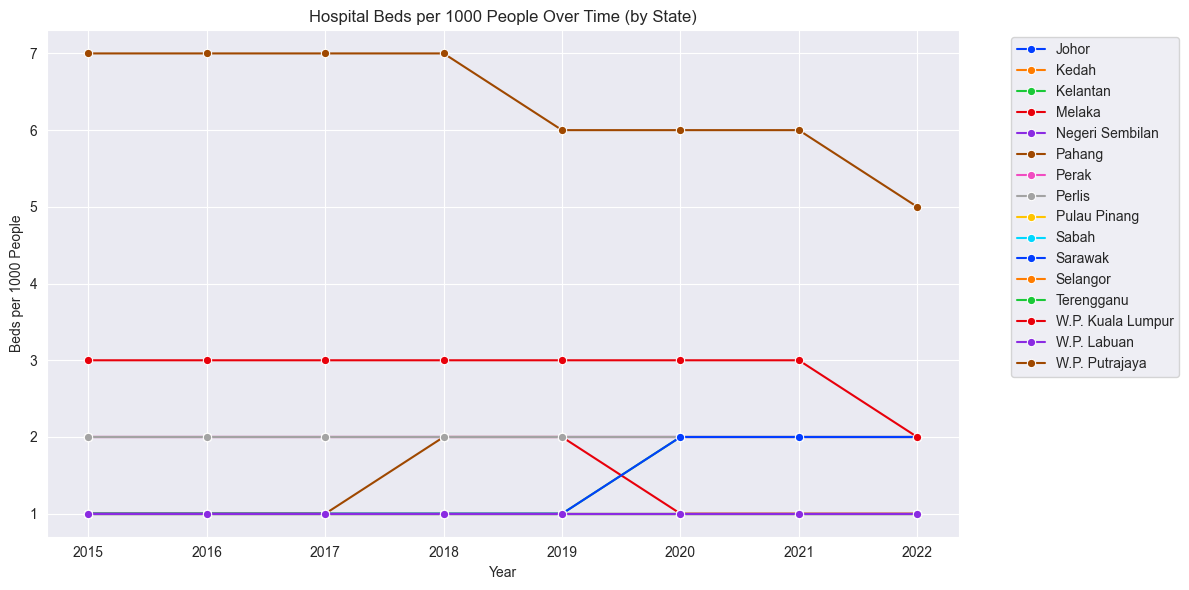

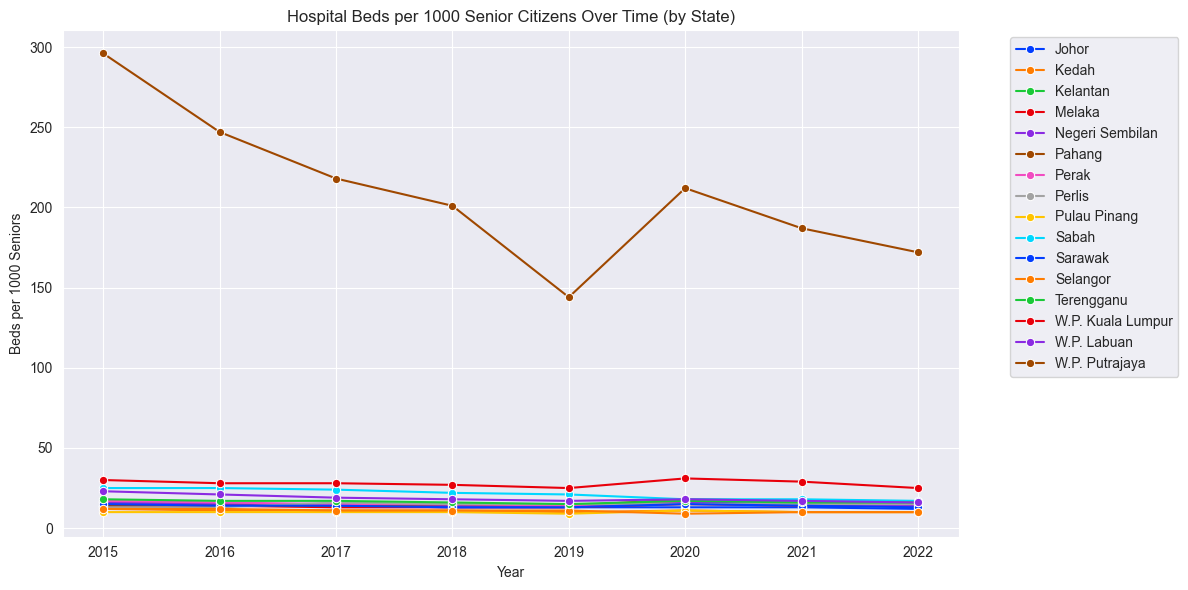

In [57]:
#Line Plot: Beds per 1000 People/Senior Over Time (by State)
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_df, x="year", y="beds_per_1000", hue="state" , palette="bright", marker="o")
plt.title("Hospital Beds per 1000 People Over Time (by State)")
plt.ylabel("Beds per 1000 People")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_df, x="year", y="beds_per_1000_senior", hue="state" , palette="bright", marker="o")
plt.title("Hospital Beds per 1000 Senior Citizens Over Time (by State)")
plt.ylabel("Beds per 1000 Seniors")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

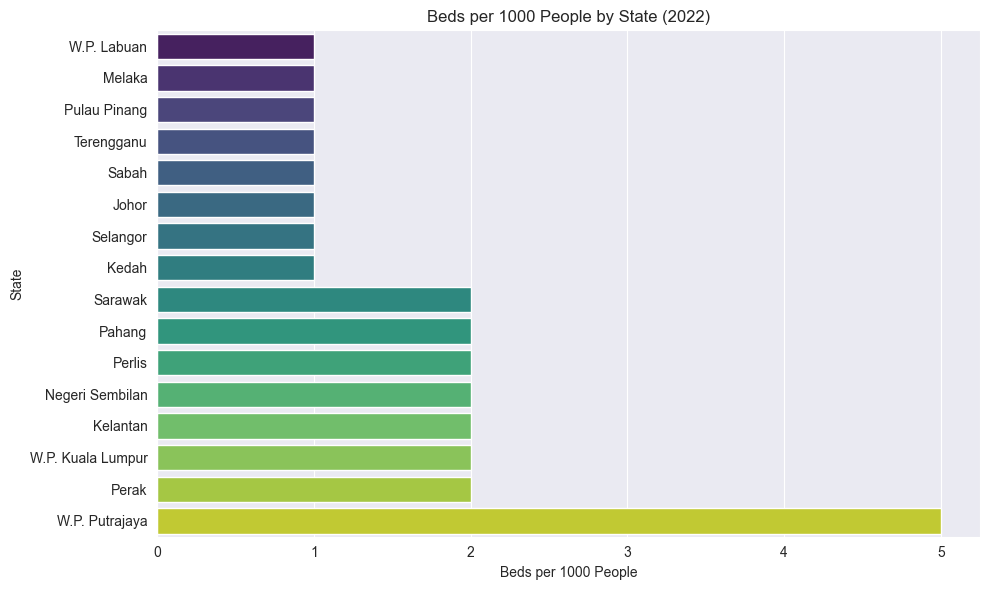

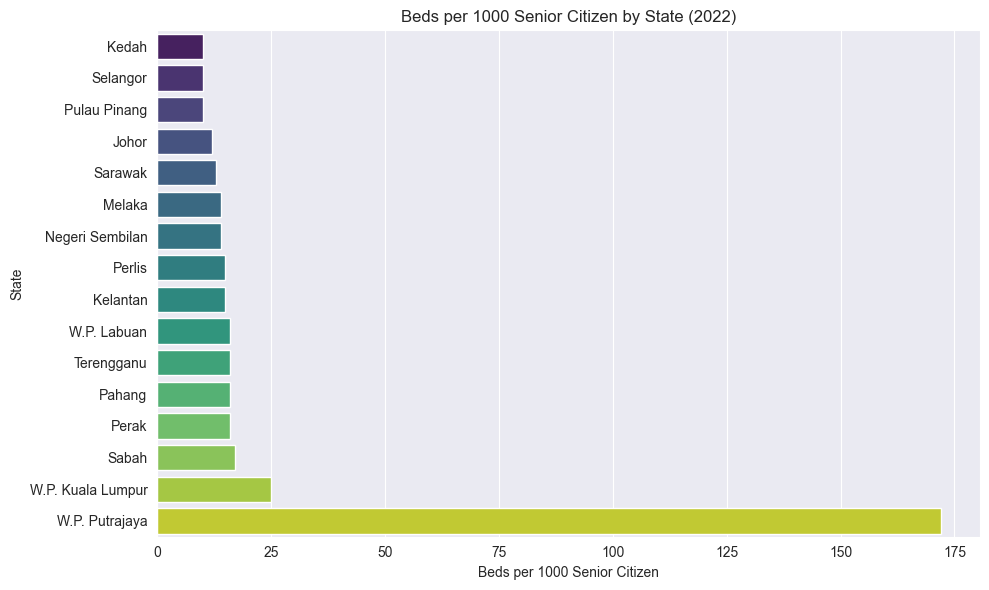

In [30]:
#Bar Plot: Compare States for the Most Recent Year
latest_pop_beds = latest_pop.sort_values("beds_per_1000", ascending=True)
latest_pop_senior_beds = latest_pop_senior.sort_values("beds_per_1000_senior", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=latest_pop_beds, x="beds_per_1000", y="state", hue="state", palette="viridis", dodge=False, legend=False)
plt.title(f"Beds per 1000 People by State ({latest_year})")
plt.xlabel("Beds per 1000 People")
plt.ylabel("State")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=latest_pop_senior_beds, x="beds_per_1000_senior", y="state", hue="state", palette="viridis", dodge=False, legend=False)
plt.title(f"Beds per 1000 Senior Citizen by State ({latest_year})")
plt.xlabel("Beds per 1000 Senior Citizen")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [37]:
# Find states with lowest and highest ratio
worst = latest_pop.sort_values("beds_per_1000").head(3)
best = latest_pop.sort_values("beds_per_1000", ascending=False).head(3)

print("🔻 States with the lowest beds per 1000 people:")
print(worst[["state", "beds_per_1000"]])

print("\n🔺 States with the highest beds per 1000 people:")
print(best[["state", "beds_per_1000"]])

🔻 States with the lowest beds per 1000 people:
            state  beds_per_1000
119   W.P. Labuan              1
31         Melaka              1
71   Pulau Pinang              1

🔺 States with the highest beds per 1000 people:
              state  beds_per_1000
127  W.P. Putrajaya              5
63           Perlis              2
47           Pahang              2


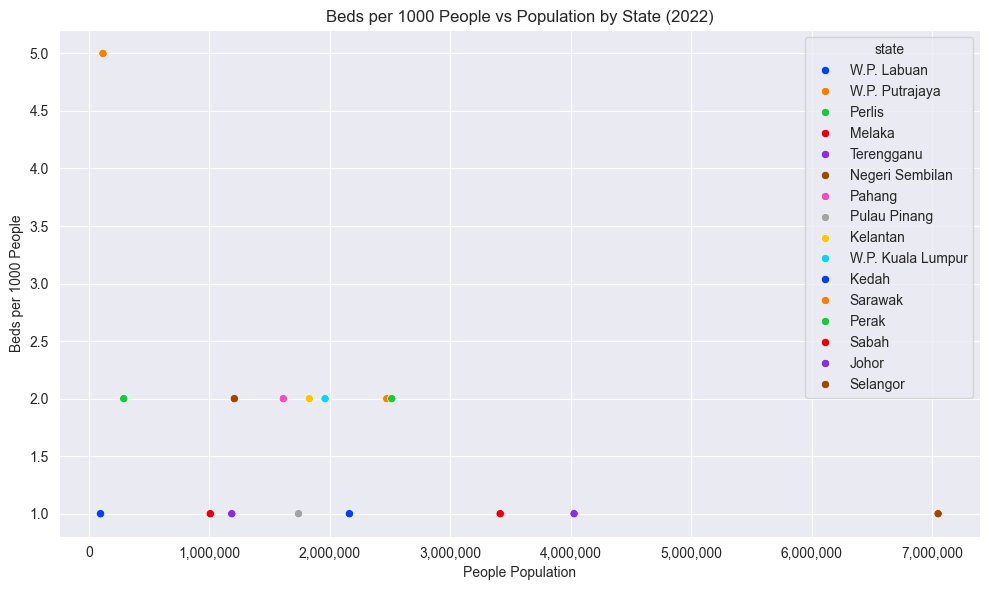

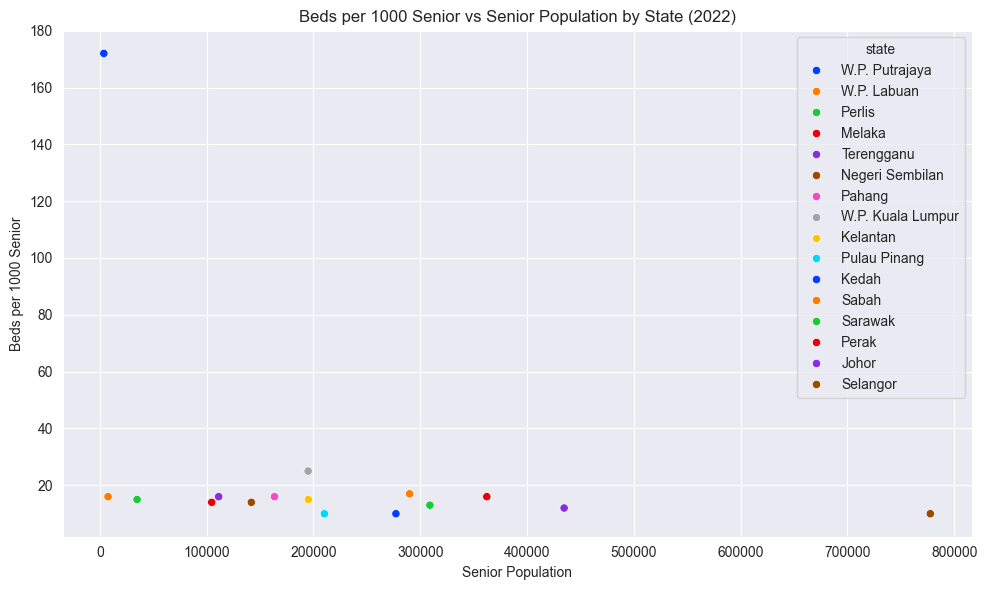

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_pop[latest_pop["year"] == latest_year],
                x="population", y="beds_per_1000", hue="state" , palette="bright")

plt.title(f"Beds per 1000 People vs Population by State ({latest_year})")
plt.xlabel("People Population")
plt.ylabel("Beds per 1000 People")
# Format x-axis with commas (e.g., 1,000,000)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_pop_senior[latest_pop_senior["year"] == latest_year],
                x="population_senior", y="beds_per_1000_senior", hue="state", palette="bright")

plt.title(f"Beds per 1000 Senior vs Senior Population by State ({latest_year})")
plt.xlabel("Senior Population")
plt.ylabel("Beds per 1000 Senior")
plt.tight_layout()
plt.show()